In [2]:
##Import and define symbols
import sympy as sp
import numpy as np 

Ti = sp.Symbol('T_i'); k = sp.Symbol('k'); To = sp.Symbol('T_o'); Ti0 = sp.Symbol('T_i_0'); To0 = sp.Symbol('T_o_0'); ho = sp.Symbol('h_o'); hi = sp.Symbol('h_i'); r = sp.Symbol('r'); ro = sp.Symbol('r_o'); ri = sp.Symbol('r_i'); Cp = sp.Symbol('C_p'); rho = sp.Symbol('rho');
T = sp.Function('T')(r)
U = sp.Function('U')(r)

C1 = sp.Symbol('C1'); C2 = sp.Symbol('C2')

# Problem 2.1.1 in the problems manual

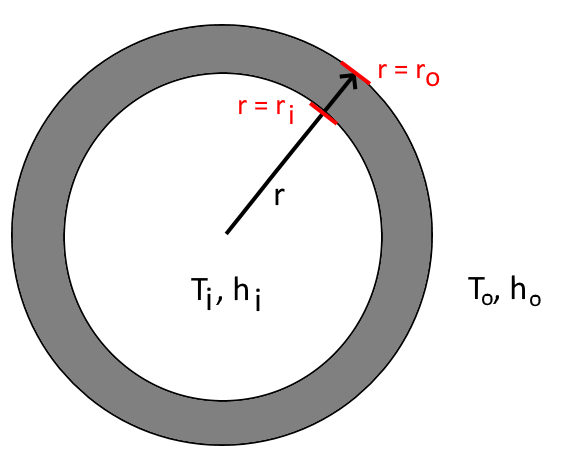

## Nomenclature table
| Nomenclature                         | Variable | Expression              |
|--------------------------------------|----------|-------------------------|
| Temperature                          | T        |                         |
| Radius                               | r        |                         |
| Convective heat transfer coefficient | h        |                         |
| Conductive heat transfer coefficient | k        |                         |
| Biot number                          | Bi       | $\frac{hR}{k}$          |
| Temperature fraction                 | $\phi$   | $\frac{T-T_o}{T_i-T_o}$ |
| Quantity "X" of internal fluid       | $X_i$    |                         |
| Quantity "X" of external fluid       | $X_o$    |                         |

## Simplifying assumptions:
1. Steady state; $\frac{dT}{dt} = 0$
2. Infinite symetric cylinder; $\frac{dT}{dz} = \frac{dT}{d\theta} = 0$; $T(r)$
3. No heat generation within the clinder; $q''' = 0$

## Differential conservation equation solution
The consititutive equation for cylindrical coordinates:
$$\rho c \frac{dT}{dt}= \frac{1}{r}\frac{d}{dr}(r\cdot k\frac{dT}{dr})+\frac{1}{r}\frac{d}{d\theta}(k\frac{dT}{d\theta})+\frac{d}{dz}(k\frac{dT}{dz})+q'''$$

When assumptions are applied:

$$0 =\frac{d^2T}{dr^2}+\frac{1}{r}\frac{dT}{dr}$$

The boundary conditions for convective heat transfer at the walls:

$$\frac{dT}{dr}(r = r_o) = \frac{h_o}{k}[T_o - T(r = r_o)]$$

$$\frac{dT}{dr}(r = r_i) = \frac{-h_i}{k}[T_i - T(r = r_i)]$$

Substituting the derivative of temperature $\frac{dT}{dr} = U(r)$ into the constitutive equation:

$$0 = \frac{dU(r)}{dr} + \frac{1}{r}\cdot U(r)$$

Seperating and integrating:

$$U(r) = \frac{dT}{dr} = \frac{c_1}{r}$$

And again:

$$T(r) = c_1\ln{r} + c_2$$

Substituting in the temperature equations into the boundary conditions yields a system of two equations and unkowns $c_1, c_2$:

$$\frac{c_1}{r_o} = \frac{h_o}{k}[T_o - (c_1\ln{r_o} + c_2)]$$

$$\frac{c_1}{r_i} = \frac{-h_i}{k}[T_i - (c_1\ln{r_i} + c_2)]$$

In [3]:
## Solve DE
#Define equation with U
eqn = (sp.Derivative(U,r)+1/r*U)
print('System differential equation with substitution for derivative of temperature:')
display(eqn)

#Solve DE for derivative of temperature (U)
Diff_U = sp.dsolve(eqn, U)
print('Expression for differential in temperature with respect to r:')
display(Diff_U)

#Redefine Temperature
Diff_T = Diff_U.subs(U, sp.Derivative(T,r))
print('Differential equation for temperature:')
display(Diff_T)

#Solve for temperature
Temp = sp.dsolve(Diff_T, T)
print('Solved expression for temperature with integration constants:')
display(Temp)

System differential equation with substitution for derivative of temperature:


Derivative(U(r), r) + U(r)/r

Expression for differential in temperature with respect to r:


Eq(U(r), C1/r)

Differential equation for temperature:


Eq(Derivative(T(r), r), C1/r)

Solved expression for temperature with integration constants:


Eq(T(r), C1*log(r) + C2)

In [4]:
#Define the two boundary conditions 
eqn1= ho/k*(To-(Temp.rhs.subs(r, ro)))-Diff_U.rhs.subs(r, ro)
eqn2= -hi/k*(Ti-(Temp.rhs.subs(r, ri)))-Diff_U.rhs.subs(r, ri)

print('First Equation')
display(eqn1)

print('Second Equation')
display(eqn2)

#Solve for c1 and c2
C1_ = sp.solve(eqn1,C1)[0]
C2_ = sp.solve(eqn2,C2)[0]
C1eq = C1_.subs(C2,C2_)-C1
C1_ = sp.simplify(sp.solve(C1eq,C1)[0])
C2_ = sp.simplify(C2_.subs(C1,C1_))

#Define biot numbers
Bi_i = sp.Symbol('Bi_i')
Bi_o = sp.Symbol('Bi_o')

#substitute biot numbers into the equation
C1_ = sp.simplify((C1_.subs(hi*ri, Bi_i*k)).subs(ho*ro, Bi_o*k))
C2_ = sp.simplify((C2_.subs(hi*ri, Bi_i*k)).subs(ho*ro, Bi_o*k))

print('C1 solved')
display(C1_)
print('C2 solved')
display(C2_)

First Equation


-C1/r_o + h_o*(-C1*log(r_o) - C2 + T_o)/k

Second Equation


-C1/r_i - h_i*(-C1*log(r_i) - C2 + T_i)/k

C1 solved


Bi_i*Bi_o*(T_i - T_o)/(Bi_i*Bi_o*log(r_i) - Bi_i*Bi_o*log(r_o) - Bi_i - Bi_o)

C2 solved


(Bi_i*Bi_o*T_i*log(r_o) - Bi_i*Bi_o*T_o*log(r_i) + Bi_i*T_i + Bi_o*T_o)/(-Bi_i*Bi_o*log(r_i) + Bi_i*Bi_o*log(r_o) + Bi_i + Bi_o)

With $Bi = \frac{hR}{k}$

Defining dimensionless parameter $\phi (r) = \frac{T(r)-T_o}{T_i-T_o}$ and solving for $\phi$ 

$$\phi(r) = \frac{c_1\ln{r}+c_2-T_o}{T_i-T_o}$$

## Investigating this behavior:

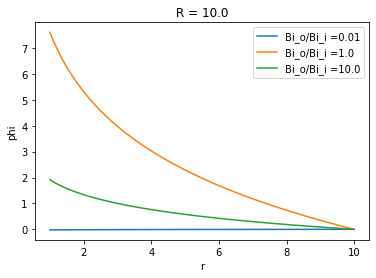

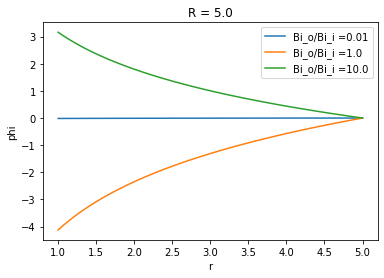

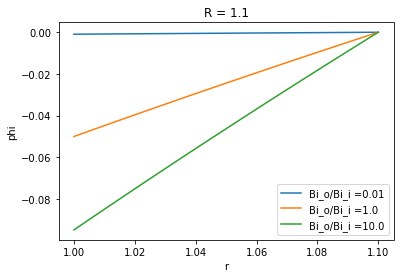

In [7]:
##Set some constants for r for a few cases
#Thick wall vs thin wall
import numpy as np
import matplotlib.pyplot as plt

r_i = 1
r_o = np.array([10, 5, 1.1])

#Investigate outside biot for constant inside biot
Bi_i = 1
Bi_o = np.array([0.01, 1, 10])
T_i = 100
T_o = 200

for j, R_o in enumerate(r_o):
    rs = np.linspace(r_i, R_o, 100)
    phis = np.zeros((len(Bi_o), len(rs)))
    for k, Bi_out in enumerate(Bi_o):
        c1 = Bi_i*Bi_out*(T_i-T_o)/(Bi_i*Bi_out*np.log(r_i)-Bi_i*Bi_out*np.log(R_o)-Bi_i-Bi_out)
        c2 = (Bi_i*Bi_out*T_i*np.log(R_o)-Bi_i*Bi_out*T_o*np.log(r_i)+Bi_i*T_i+Bi_out*T_o)/(-Bi_i*Bi_out*np.log(r_i)+Bi_i*Bi_out*np.log(R_o)+Bi_i+Bi_out)
        #phis[k][:] = (c1*np.log(rs)+c2 - T_o)/(T_i-T_o)
        phis[k][:] = (np.log(rs/R_o))/(np.log(r_i/R_o)+1/Bi_out + 1/Bi_i)
        plt.figure(j)
        plt.plot(rs, phis[k][:],label = 'Bi_o/Bi_i ='+str(Bi_out))
    plt.legend()
    plt.xlabel('r')
    plt.ylabel('phi')
    plt.title('R = '+str(R_o))
    


In interpereting the graphs, it us useful to remember that $\phi = 1$ corresponds to the temperature being equal to the internal air temperature, and $\phi = 0$ corresponds to temoerature being equal to the external air temperature.

## Points to note:
1. For a thin wall (Thickness << cylinder diameter), the internal temperature is nearly constant and determined by the convective coefficients. If convective transfer is much more prominent on the external surface than the internal surface, then the cylinder temperature is equal to the external temperature and vice versa. For comparible convective forces, the cylinder temperature is somewhere in between the two air temperatures.
2. For thin walls, the slight temperature distribution that is exhibited is nearly linear, approcimating this case to a slab wall instead of a cylinder wall.
3. For thick walls (Thickness ~ cylinder diameter), a distribution of temperatures is much more prominent, and the curviture of the cylinder is noted as it is non linear. This is intuitive, as for a cyliner the area of flux increases as radius increases, so temperature change should slow down as radius increases, which we do see.
4. What we note is that the greater a Biot number is compared to the other side of the cylinder, the closer the wall temperature on that side comes to the air temperature. Alternatively, if the Biot numbers are of similar magnitude, the wall temperature on both sides of the cylinder walls do not approach the air temperatures but are instead in between the two.